# Benchmark Bernoulli Markovian Tree model

This notebook aims at verifying the convergence and benchmarking the Bernoulli Markovian Tree Model.

## Artificial dataset

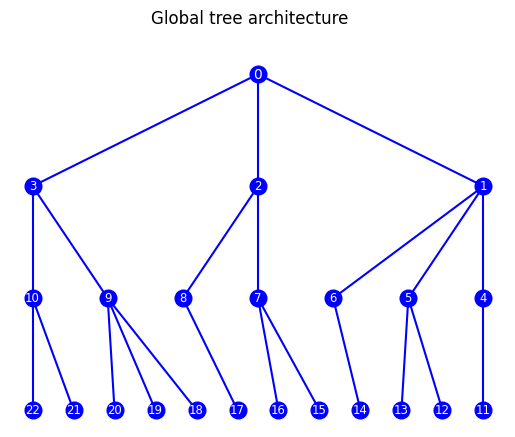

In [1]:
from src.utils import Tree
import matplotlib.pyplot as plt

# Define a global tree architecture

global_adjacency_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 0
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 1
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # node 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], # node 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # node 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], # node 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], # node 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 14
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 15
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 17
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 19
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # node 22
]

global_tree = Tree(global_adjacency_matrix)
global_tree.plot(title="Global tree architecture")
plt.show()

In [2]:
from src.model import BernoulliTreePrior, DirichletAbundanceTreePosterior
import numpy as np

# Generate the dataset based on the previous architecture
dataset_size = 1000

# First we define the parameters of the model, which are our objectives
activation_probabilities = {
    0:1,
    1:0.999,
    2:0.998,
    3:0.995,
    4:0.45,
    5:0.75,
    6:0.8,
    7:0.94,
    8:0.25,
    9:0.9,
    10:0.65,
    11:0.95,
    12:0.76,
    13:0.5,
    14:0.76,
    15:0.67,
    16:0.1,
    17:0.6,
    18:0.2,
    19:0.7,
    20:0.53,
    21:0.9,
    22:0.2
}

dirichlet_parameters = {}
for i, adjacency in enumerate(global_tree.adjacent_matrix):
    countChildren = np.sum(adjacency)
    if countChildren > 1:
        dirichlet_parameters[i] = np.abs(np.random.rand(countChildren))

def generate_dataset(size):

    prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities)
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters)

    trees = []

    for i in range(dataset_size):
        sampled_tree = prior.sample_tree()
        sampled_abundance_tree = posterior.sample_abundance_tree(sampled_tree)
        trees.append(sampled_abundance_tree)

    return trees

trees = generate_dataset(dataset_size)

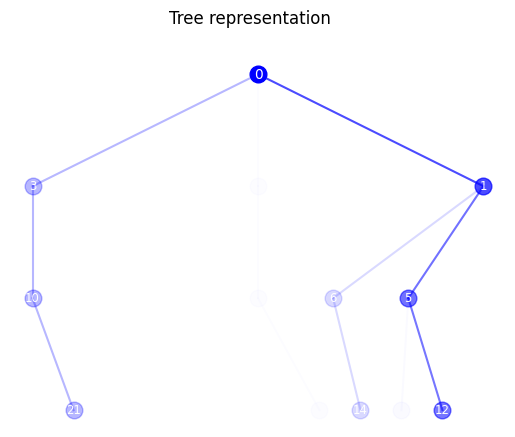

In [3]:
# plot a few trees
n_plot = 1
for i in range(n_plot):
    tree = trees[i]
    tree.plot()
plt.show()

## Learning the distributions over the artificial data

Fitting DirichletAbundanceTree - Likelihood: 33.94411705133221
Fitting DirichletAbundanceTree - Likelihood: 34.10959302956573
Fitting DirichletAbundanceTree - Likelihood: 34.17798901855313
Fitting DirichletAbundanceTree - Likelihood: 34.212115561210126
Fitting DirichletAbundanceTree - Likelihood: 34.23075393153827
Fitting DirichletAbundanceTree - Likelihood: 34.24165340838973
Fitting DirichletAbundanceTree - Likelihood: 34.24837342931075
Fitting DirichletAbundanceTree - Likelihood: 34.252682589507074
Fitting DirichletAbundanceTree - Likelihood: 34.25552518759845
Fitting DirichletAbundanceTree - Likelihood: 34.257439164903566
Fitting DirichletAbundanceTree - Likelihood: 34.258747909252804
Fitting DirichletAbundanceTree - Likelihood: 34.259653992420844
Fitting DirichletAbundanceTree - Likelihood: 34.26028813235631
Fitting DirichletAbundanceTree - Likelihood: 34.26073646528929
Fitting DirichletAbundanceTree - Likelihood: 34.26105660456626
Fitting DirichletAbundanceTree - Likelihood: 34.26

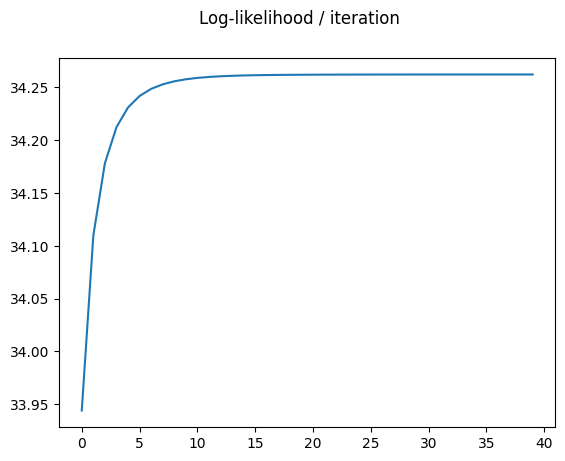

In [4]:
# Using the artificial dataset, we try to compute the p(X,T)

prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

prior.fit(trees)
ll = posterior.fit(trees, n_iter=40)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")
axs.plot(ll)

We repeat the experiments a several times to look at the general convergence profile.

* Experiment 0
Fitting DirichletAbundanceTree - Likelihood: 21.61768435823632
Fitting DirichletAbundanceTree - Likelihood: 21.905105018965575
Fitting DirichletAbundanceTree - Likelihood: 21.980011662763996
Fitting DirichletAbundanceTree - Likelihood: 22.009713426579168
Fitting DirichletAbundanceTree - Likelihood: 22.02557672501405
Fitting DirichletAbundanceTree - Likelihood: 22.035991138290886
Fitting DirichletAbundanceTree - Likelihood: 22.04366788271287
Fitting DirichletAbundanceTree - Likelihood: 22.04967006527244
Fitting DirichletAbundanceTree - Likelihood: 22.054511122582355
Fitting DirichletAbundanceTree - Likelihood: 22.058488138774454
Fitting DirichletAbundanceTree - Likelihood: 22.06179588114296
Fitting DirichletAbundanceTree - Likelihood: 22.064572147247198
Fitting DirichletAbundanceTree - Likelihood: 22.06691904546561
Fitting DirichletAbundanceTree - Likelihood: 22.068914562839304
Fitting DirichletAbundanceTree - Likelihood: 22.070619570348043
Fitting DirichletAbundanceTree 

Fitting DirichletAbundanceTree - Likelihood: 22.07710132052242
Fitting DirichletAbundanceTree - Likelihood: 22.077965540785563
Fitting DirichletAbundanceTree - Likelihood: 22.078635668940233
Fitting DirichletAbundanceTree - Likelihood: 22.07916557678935
Fitting DirichletAbundanceTree - Likelihood: 22.07959141884935
Fitting DirichletAbundanceTree - Likelihood: 22.07993837950137
Fitting DirichletAbundanceTree - Likelihood: 22.080224487093357
Fitting DirichletAbundanceTree - Likelihood: 22.08046293074907
Fitting DirichletAbundanceTree - Likelihood: 22.080663536519328
Fitting DirichletAbundanceTree - Likelihood: 22.08083374078664
Fitting DirichletAbundanceTree - Likelihood: 22.08097924976686
Fitting DirichletAbundanceTree - Likelihood: 22.081104496577368
Fitting DirichletAbundanceTree - Likelihood: 22.08121296424849
Fitting DirichletAbundanceTree - Likelihood: 22.081307417891363
Fitting DirichletAbundanceTree - Likelihood: 22.081390074044386
Fitting DirichletAbundanceTree - Likelihood: 22.

Fitting DirichletAbundanceTree - Likelihood: 22.02016252204467
Fitting DirichletAbundanceTree - Likelihood: 22.026159803862143
Fitting DirichletAbundanceTree - Likelihood: 22.03151350368358
Fitting DirichletAbundanceTree - Likelihood: 22.0362869846582
Fitting DirichletAbundanceTree - Likelihood: 22.04054115041272
Fitting DirichletAbundanceTree - Likelihood: 22.044333457935515
Fitting DirichletAbundanceTree - Likelihood: 22.047717174862903
Fitting DirichletAbundanceTree - Likelihood: 22.050740910366002
Fitting DirichletAbundanceTree - Likelihood: 22.053448406828473
Fitting DirichletAbundanceTree - Likelihood: 22.055878554306858
Fitting DirichletAbundanceTree - Likelihood: 22.058065578112608
Fitting DirichletAbundanceTree - Likelihood: 22.06003934808235
Fitting DirichletAbundanceTree - Likelihood: 22.06182576268704
Fitting DirichletAbundanceTree - Likelihood: 22.06344716904237
Fitting DirichletAbundanceTree - Likelihood: 22.06492278889611
Fitting DirichletAbundanceTree - Likelihood: 22.0

Fitting DirichletAbundanceTree - Likelihood: 22.08050093279112
Fitting DirichletAbundanceTree - Likelihood: 22.080653609586825
Fitting DirichletAbundanceTree - Likelihood: 22.080791235570548
Fitting DirichletAbundanceTree - Likelihood: 22.08091534573237
Fitting DirichletAbundanceTree - Likelihood: 22.08102731037224
Fitting DirichletAbundanceTree - Likelihood: 22.081128354720576
Fitting DirichletAbundanceTree - Likelihood: 22.081219575654103
Fitting DirichletAbundanceTree - Likelihood: 22.08130195609949
Fitting DirichletAbundanceTree - Likelihood: 22.081376377555596
Fitting DirichletAbundanceTree - Likelihood: 22.081443631059567
Fitting DirichletAbundanceTree - Likelihood: 22.081504426842532
Fitting DirichletAbundanceTree - Likelihood: 22.081559402868127
Fitting DirichletAbundanceTree - Likelihood: 22.08160913240879
Fitting DirichletAbundanceTree - Likelihood: 22.081654130784976


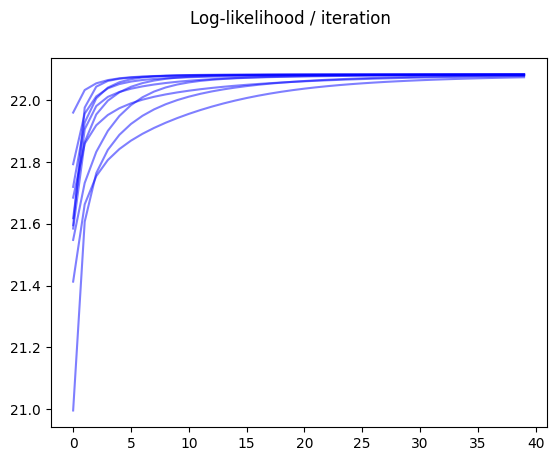

In [5]:
# Using the artificial dataset, we try to compute the p(X,T)

fig, axs = plt.subplots()
fig.suptitle("Log-likelihood / iteration")

n_repeat = 10

prior_list = []
posterior_list = []

for _ in range(n_repeat):
    print("* Experiment", _)
    prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
    posterior = DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={})

    prior.fit(trees)
    ll = posterior.fit(trees, n_iter=40)

    prior_list.append(prior)
    posterior_list.append(posterior)

    axs.plot(ll, color='blue', alpha=0.5)

plt.show()

Now we would like to compare the fitted distribution to the true one.

proba | node 0 : 1  -  1.0
proba | node 1 : 0.999  -  1.0
proba | node 2 : 0.998  -  0.999
proba | node 3 : 0.995  -  0.997
proba | node 4 : 0.45  -  0.457
proba | node 5 : 0.75  -  0.777
proba | node 6 : 0.8  -  0.786
proba | node 7 : 0.94  -  0.928928928928929
proba | node 8 : 0.25  -  0.25625625625625625
proba | node 9 : 0.9  -  0.8996990972918756
proba | node 10 : 0.65  -  0.6479438314944834
proba | node 11 : 0.95  -  0.936542669584245
proba | node 12 : 0.76  -  0.8095238095238095
proba | node 13 : 0.5  -  0.4839124839124839
proba | node 14 : 0.76  -  0.7379134860050891
proba | node 15 : 0.67  -  0.6411637931034483
proba | node 16 : 0.1  -  0.10344827586206896
proba | node 17 : 0.6  -  0.62890625
proba | node 18 : 0.2  -  0.20066889632107024
proba | node 19 : 0.7  -  0.6989966555183946
proba | node 20 : 0.53  -  0.5083612040133779
proba | node 21 : 0.9  -  0.9040247678018576
proba | node 22 : 0.2  -  0.19195046439628483
alpha | node 0 : [0.75032819 0.19557701 0.49135119]  -  [0.694

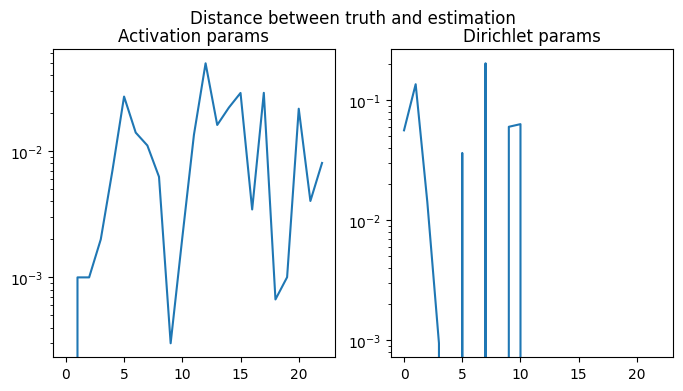

In [7]:
def compute_params_difference(prior, posterior, printValues=False):
    # We compute the distance between the activation probabilities
    activation_proba_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in activation_probabilities.keys():
        activation_proba_difference[node_index] = np.abs(activation_probabilities[node_index] - prior.nodes[node_index].activationProba)
        if printValues:
            print("proba | node", node_index, ":", activation_probabilities[node_index], " - ", prior.nodes[node_index].activationProba)

    # Then we compute the distance between the alpha parameters of the dirichlet distribution
    dirichlet_params_difference = np.zeros(len(activation_probabilities.values()))
    for node_index in dirichlet_parameters.keys():
        dirichlet_params_difference[node_index] = np.linalg.norm(
            np.array(dirichlet_parameters[node_index]) - np.array(posterior.dirichlet_params[node_index])
        )
        if printValues:
            print("alpha | node", node_index, ":", dirichlet_parameters[node_index], " - ", posterior.dirichlet_params[node_index])

    return activation_proba_difference, dirichlet_params_difference

activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(activation_proba_difference)
axs[1].plot(dirichlet_params_difference)
axs[0].set_title("Activation params")
axs[1].set_title("Dirichlet params")
axs[1].set_yscale("log")
axs[0].set_yscale("log")
fig.suptitle("Distance between truth and estimation")
plt.show()

We also make these converence error profiles for several models

proba | node 0 : 1  -  1.0
proba | node 1 : 0.999  -  1.0
proba | node 2 : 0.998  -  0.998
proba | node 3 : 0.995  -  0.99
proba | node 4 : 0.45  -  0.44
proba | node 5 : 0.75  -  0.752
proba | node 6 : 0.8  -  0.779
proba | node 7 : 0.94  -  0.9438877755511023
proba | node 8 : 0.25  -  0.2575150300601202
proba | node 9 : 0.9  -  0.9030303030303031
proba | node 10 : 0.65  -  0.6585858585858586
proba | node 11 : 0.95  -  0.9454545454545454
proba | node 12 : 0.76  -  0.7792553191489362
proba | node 13 : 0.5  -  0.488031914893617
proba | node 14 : 0.76  -  0.7471116816431322
proba | node 15 : 0.67  -  0.6528662420382165
proba | node 16 : 0.1  -  0.09978768577494693
proba | node 17 : 0.6  -  0.6108949416342413
proba | node 18 : 0.2  -  0.17785234899328858
proba | node 19 : 0.7  -  0.7225950782997763
proba | node 20 : 0.53  -  0.540268456375839
proba | node 21 : 0.9  -  0.9171779141104295
proba | node 22 : 0.2  -  0.21625766871165644
alpha | node 0 : [0.03909222 0.05596986 0.29893601]  -  [

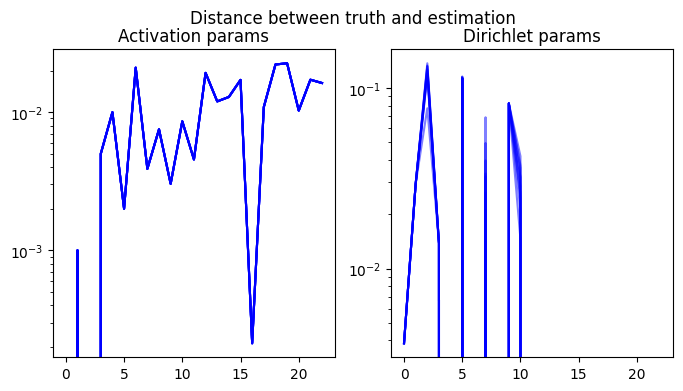

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i in range(len(prior_list)):
    prior = prior_list[i]
    posterior = posterior_list[i]
    activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior, printValues=True)
    axs[0].plot(activation_proba_difference, color='blue', alpha=0.5)
    axs[1].plot(dirichlet_params_difference, color='blue', alpha=0.5)
    axs[0].set_title("Activation params")
    axs[1].set_title("Dirichlet params")
    axs[1].set_yscale("log")
    axs[0].set_yscale("log")
fig.suptitle("Distance between truth and estimation")
plt.show()

### Convergence per iteration

We can then plot the evolution of the distance per iteration

Fitting DirichletAbundanceTree - Likelihood: 34.025740102335675
Fitting DirichletAbundanceTree - Likelihood: 33.64218620548434
Fitting DirichletAbundanceTree - Likelihood: 33.365890978045925
Fitting DirichletAbundanceTree - Likelihood: 33.49603417125417
Fitting DirichletAbundanceTree - Likelihood: 33.51496091121738
Fitting DirichletAbundanceTree - Likelihood: 33.93133330003955
Fitting DirichletAbundanceTree - Likelihood: 33.445416854791766
Fitting DirichletAbundanceTree - Likelihood: 34.06281857058351
Fitting DirichletAbundanceTree - Likelihood: 33.2172160549469
Fitting DirichletAbundanceTree - Likelihood: 34.08205201344134
Fitting DirichletAbundanceTree - Likelihood: 34.134003416133034
Fitting DirichletAbundanceTree - Likelihood: 33.97986736331376
Fitting DirichletAbundanceTree - Likelihood: 33.74185280714493
Fitting DirichletAbundanceTree - Likelihood: 33.838003680095674
Fitting DirichletAbundanceTree - Likelihood: 33.93922370382637
Fitting DirichletAbundanceTree - Likelihood: 34.168

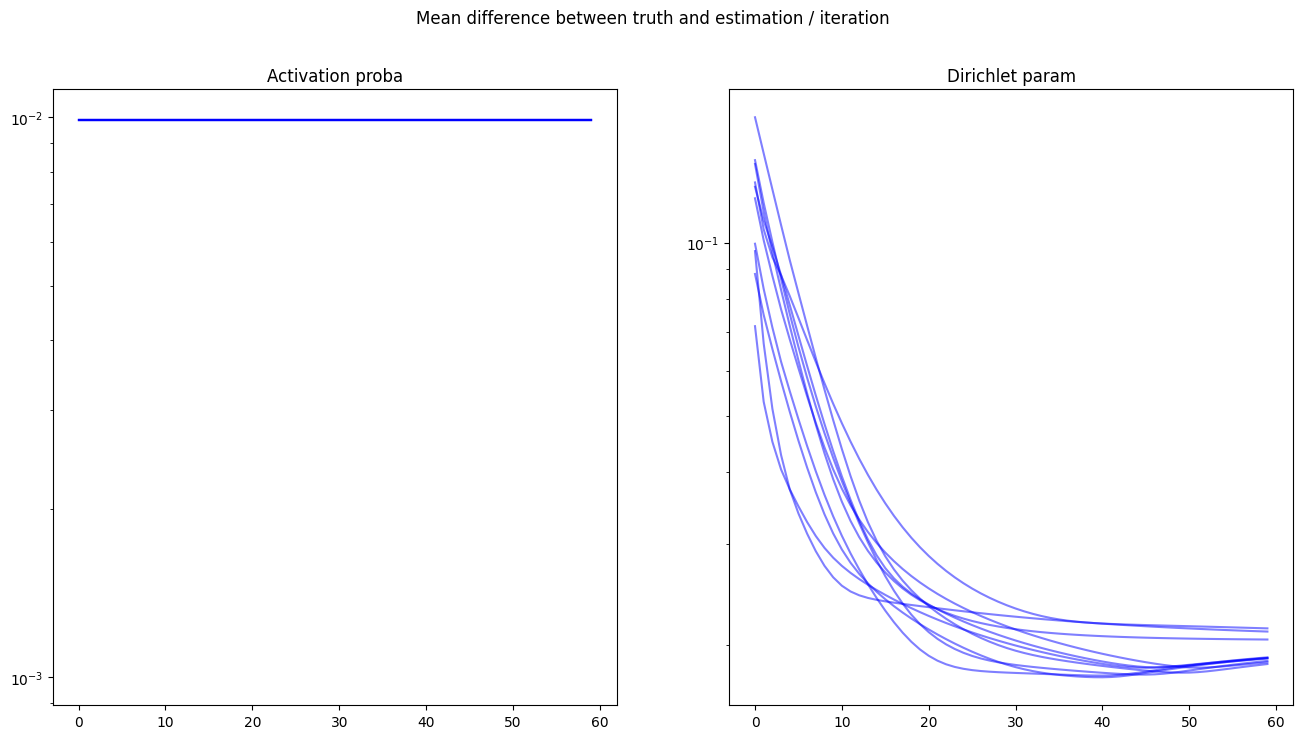

In [13]:
max_iter = 60

prior = BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities={})
posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

prior.fit(trees)

activation_proba_mean_difference = np.zeros((n_repeat, max_iter))
dirichlet_params_mean_difference = np.zeros((n_repeat, max_iter))

for i in range(max_iter):

    for k, posterior in enumerate(posterior_list):
        posterior.fit(trees, n_iter=1)
        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / iteration")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
for k in range(n_repeat):
    axs[0].plot(activation_proba_mean_difference[k], color='blue', alpha=0.5)
    axs[1].plot(dirichlet_params_mean_difference[k], color='blue', alpha=0.5)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

### Convergence per sample

In [ ]:
size_list = [10, 50, 150, 300, 400, 600, 800, 1000]

activation_proba_mean_difference = np.zeros((n_repeat, len(size_list)))
dirichlet_params_mean_difference = np.zeros((n_repeat, len(size_list)))

for i, size in enumerate(size_list):
    print("Experiment: ", size)
    trees = generate_dataset(size)
    prior_list = [BernoulliTreePrior(global_tree.adjacent_matrix, activation_probabilities=activation_probabilities) for _ in range(n_repeat)]
    posterior_list = [DirichletAbundanceTreePosterior(global_tree, dirichlet_parameters={}) for _ in range(n_repeat)]

    for k in range(n_repeat):
        prior = prior_list[k]
        posterior = posterior_list[k]

        prior.fit(trees)
        posterior.fit(trees, n_iter=40)

        activation_proba_difference, dirichlet_params_difference = compute_params_difference(prior, posterior)

        activation_proba_mean_difference[k][i] = activation_proba_difference.mean()
        dirichlet_params_mean_difference[k][i] = dirichlet_params_difference.mean()

fig, axs = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Mean difference between truth and estimation / n_samples")
axs[0].set_title("Activation proba")
axs[1].set_title("Dirichlet param")
for k in range(n_repeat):
    axs[0].plot(size_list, activation_proba_mean_difference[k], color='blue', alpha=0.5)
    axs[1].plot(size_list, dirichlet_params_mean_difference[k], color='blue', alpha=0.5)
axs[0].set_yscale('log')
axs[1].set_yscale('log')

Experiment:  10
Fitting DirichletAbundanceTree - Likelihood: 21.289968954113974
Fitting DirichletAbundanceTree - Likelihood: 21.3567675084043
Fitting DirichletAbundanceTree - Likelihood: 21.376932885104527
Fitting DirichletAbundanceTree - Likelihood: 21.38882612021502
Fitting DirichletAbundanceTree - Likelihood: 21.39731507821625
Fitting DirichletAbundanceTree - Likelihood: 21.40391834993626
Fitting DirichletAbundanceTree - Likelihood: 21.409279704558784
Fitting DirichletAbundanceTree - Likelihood: 21.413727632375327
Fitting DirichletAbundanceTree - Likelihood: 21.41745624208438
Fitting DirichletAbundanceTree - Likelihood: 21.420595210314353
Fitting DirichletAbundanceTree - Likelihood: 21.423240082895536
Fitting DirichletAbundanceTree - Likelihood: 21.42546640629528
Fitting DirichletAbundanceTree - Likelihood: 21.427336684963652
Fitting DirichletAbundanceTree - Likelihood: 21.428903988125864
Fitting DirichletAbundanceTree - Likelihood: 21.4302139463505
Fitting DirichletAbundanceTree - 

Fitting DirichletAbundanceTree - Likelihood: 21.33127536853686
Fitting DirichletAbundanceTree - Likelihood: 21.338273466645195
Fitting DirichletAbundanceTree - Likelihood: 21.344386417010615
Fitting DirichletAbundanceTree - Likelihood: 21.349786667826592
Fitting DirichletAbundanceTree - Likelihood: 21.354609111273163
Fitting DirichletAbundanceTree - Likelihood: 21.358959960754067
Fitting DirichletAbundanceTree - Likelihood: 21.36292315824744
Fitting DirichletAbundanceTree - Likelihood: 21.366565168849647
Fitting DirichletAbundanceTree - Likelihood: 21.369938659727474
Fitting DirichletAbundanceTree - Likelihood: 21.37308537152832
Fitting DirichletAbundanceTree - Likelihood: 21.376038384358885
Fitting DirichletAbundanceTree - Likelihood: 21.37882391783333
Fitting DirichletAbundanceTree - Likelihood: 21.38146276583023
Fitting DirichletAbundanceTree - Likelihood: 21.383971441296417
Fitting DirichletAbundanceTree - Likelihood: 21.386363089173862
Fitting DirichletAbundanceTree - Likelihood: 

Fitting DirichletAbundanceTree - Likelihood: 21.433785984542602
Fitting DirichletAbundanceTree - Likelihood: 21.434261208585895
Fitting DirichletAbundanceTree - Likelihood: 21.434647942759216
Fitting DirichletAbundanceTree - Likelihood: 21.434962969597702
Fitting DirichletAbundanceTree - Likelihood: 21.435219895960753
Fitting DirichletAbundanceTree - Likelihood: 21.43542974734534
Fitting DirichletAbundanceTree - Likelihood: 21.435601452375444
Fitting DirichletAbundanceTree - Likelihood: 21.43574223774486
Fitting DirichletAbundanceTree - Likelihood: 21.435857949972373
Fitting DirichletAbundanceTree - Likelihood: 21.435953317294214
Fitting DirichletAbundanceTree - Likelihood: 21.436032162604107
Fitting DirichletAbundanceTree - Likelihood: 21.436097576395582
Fitting DirichletAbundanceTree - Likelihood: 21.436152057062348
Fitting DirichletAbundanceTree - Likelihood: 21.43619762459531
Fitting DirichletAbundanceTree - Likelihood: 21.436235912630238
Fitting DirichletAbundanceTree - Likelihood

Fitting DirichletAbundanceTree - Likelihood: 21.436357093456106
Fitting DirichletAbundanceTree - Likelihood: 21.4363770937267
Fitting DirichletAbundanceTree - Likelihood: 21.4363943038206
Fitting DirichletAbundanceTree - Likelihood: 21.436409196219163
Fitting DirichletAbundanceTree - Likelihood: 21.436422143647217
Fitting DirichletAbundanceTree - Likelihood: 21.436433444225035
Fitting DirichletAbundanceTree - Likelihood: 21.43644333955222
Fitting DirichletAbundanceTree - Likelihood: 21.43645202783408
Fitting DirichletAbundanceTree - Likelihood: 21.436459673503585
Fitting DirichletAbundanceTree - Likelihood: 21.436466414351667
Fitting DirichletAbundanceTree - Likelihood: 21.436472366870458
Fitting DirichletAbundanceTree - Likelihood: 21.436477630306552
Fitting DirichletAbundanceTree - Likelihood: 21.436482289774627
Experiment:  50
Fitting DirichletAbundanceTree - Likelihood: 23.304462306279596
Fitting DirichletAbundanceTree - Likelihood: 23.310227248109054
Fitting DirichletAbundanceTree